### COVID-19 Cases-Deaths-Recovery

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
covid = pd.read_csv("covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type:",covid.dtypes)

Size/Shape of the dataset (13209, 8)
Checking for null values:
 SNo                   0
ObservationDate       0
Province/State     6382
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data-type: SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [4]:
#Dropping the column SNO
covid.drop(["SNo"],1,inplace = True)

In [5]:
#Convert dtype to numeric
covid['Confirmed'] = pd.to_numeric(covid['Confirmed'])     
covid['Deaths'] = pd.to_numeric(covid['Deaths'])
covid['Recovered'] = pd.to_numeric(covid['Recovered'])

In [6]:
#Data Analysis for US
us_data = covid[covid["Country/Region"]=="US"]
us_data

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
69,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
117,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
118,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
158,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...
13199,04/08/2020,Virginia,US,2020-04-08 22:59:00,3645.0,66.0,0.0
13200,04/08/2020,Washington,US,2020-04-08 22:59:00,9276.0,426.0,0.0
13201,04/08/2020,West Virginia,US,2020-04-08 22:59:00,483.0,4.0,0.0
13203,04/08/2020,Wisconsin,US,2020-04-08 22:59:00,2710.0,100.0,0.0


In [7]:
#Data Analysis for Washington
w_data = us_data[us_data["Province/State"]=="Washington"]
w_data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
69,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
117,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
158,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0
202,01/26/2020,Washington,US,1/26/20 16:00,1.0,0.0,0.0


<Figure size 1440x720 with 0 Axes>

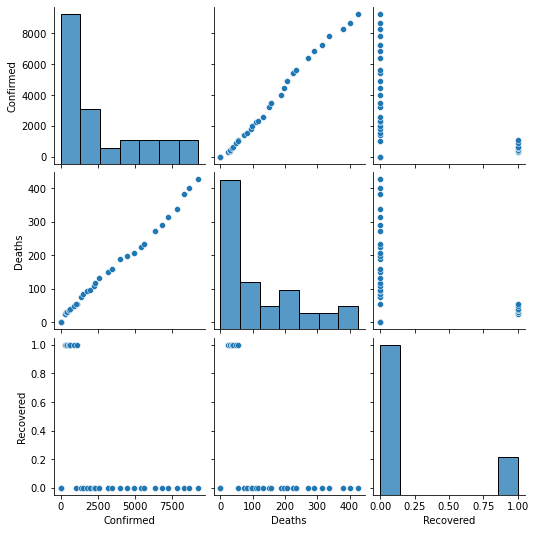

In [8]:
data_numeric = w_data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

In [9]:
X = w_data['Confirmed'].values.reshape(-1,1)
y = w_data['Deaths'].values.reshape(-1,1)

### Split our data into training and testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
model = LinearRegression()
model

LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9941904564032181
Testing Data Score: 0.994539247778435


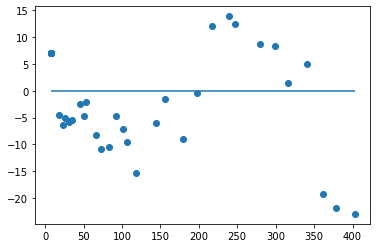

In [14]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

The linear model is: Y = 6.3115 + 0.043498X


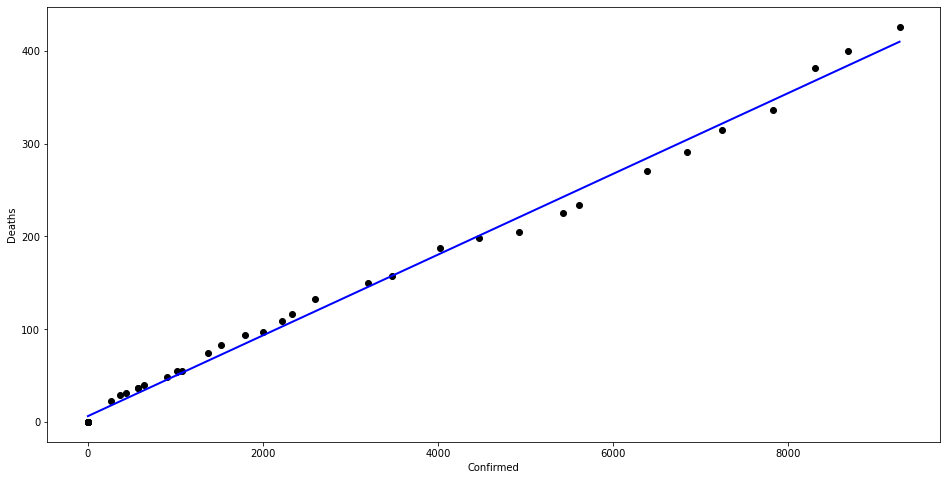

In [15]:
reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.show()

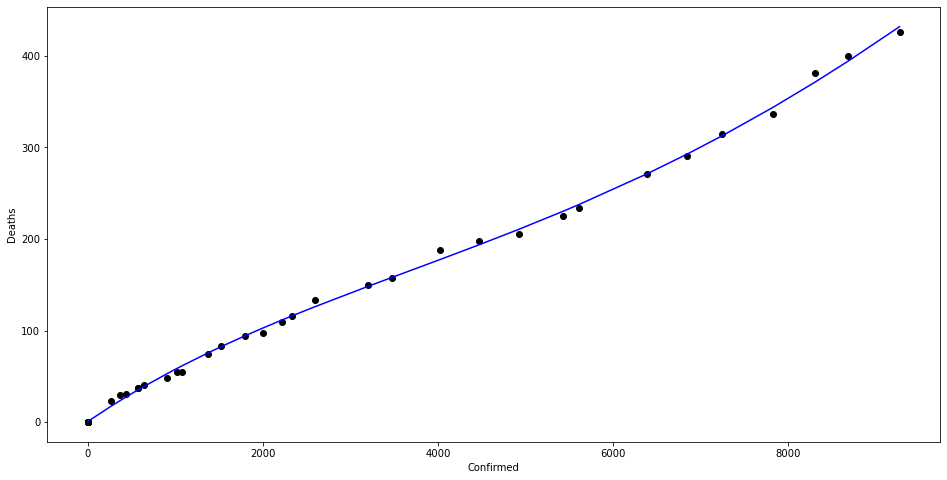

In [16]:
poly = PolynomialFeatures(degree =4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred = lin2.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    new_X, new_y,
    c='blue'
)
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.show()